<a href="https://colab.research.google.com/github/Roopesh-DMahanthi/lymphoma-cell-detection/blob/master/Lymphoma_Cell_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('https://github.com/Roopesh-DMahanthi/lymphoma-cell-detection/raw/master/Lymphoma-Dataset.csv') 

In [5]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V7091,V7092,V7093,V7094,V7095,V7096,V7097,V7098,V7099,V7100,V7101,V7102,V7103,V7104,V7105,V7106,V7107,V7108,V7109,V7110,V7111,V7112,V7113,V7114,V7115,V7116,V7117,V7118,V7119,V7120,V7121,V7122,V7123,V7124,V7125,V7126,V7127,V7128,V7129,TYPE
0,-104,-187,-26,59,-238,-258,-400,-146,-34,-100,-184,-415,-204,-71,143,190,41,-449,17480,-78,110,-173,3,-136,10,-79,-78,113,-8,-52,-175,14,-408,-217,-202,384,541,2310,21,-160,...,357,69,233,371,-92,21210,13993,1645,354,-341,12542,8233,298,11319,-72,229,778,16,409,41,111,234,354,71,286,575,-210,-1468,165,132,1036,-161,1523,-72,897,366,3,76,-28,DLBCL-C
1,-152,-328,-52,267,-300,-314,578,-185,111,148,-85,-508,-494,-25,251,273,-144,-220,12086,-74,13,-37,52,-46,35,-27,-58,-107,-127,-108,-331,6,-685,-378,-516,-325,97,6170,1780,254,...,7216,-27,333,287,-31,7490,15232,411,272,258,17542,14754,270,5700,-136,48,346,13,338,2,708,185,363,221,176,409,-262,-2333,2076,147,4254,-75,6056,-68,737,81,-4,41,-45,DLBCL-C
2,-158,-129,11,88,-239,-429,-891,-258,22,-271,103,-411,-572,-195,-164,45,4,-288,8611,-125,-45,-70,-7,-122,-21,-100,-135,29,-20,-49,-373,81,-741,-318,-312,491,493,6772,1452,1272,...,5885,84,237,400,281,24760,14082,384,233,28,13338,15725,433,9175,-273,96,335,-31,318,35,453,112,263,266,299,630,-399,-2024,1468,169,1934,-129,2901,-9,946,450,38,164,-62,DLBCL-C
3,-124,-121,-3,-37,-210,-309,-489,-69,-35,172,-117,-263,-410,-150,-315,45,-240,-138,24197,-152,-87,-9,25,-95,-37,-47,-47,178,-31,-103,-170,-69,-1160,-849,-731,-694,47,3017,11801,10003,...,2606,59,196,188,61,18747,17627,347,206,67,16591,9551,160,8049,-214,33,269,-23,224,1,335,-85,93,126,63,166,-99,-626,910,13,2469,93,2465,-119,339,321,-63,73,-13,DLBCL-C
4,-93,-258,-36,109,-109,-272,-469,-279,-90,-31,-125,-234,8,-50,125,176,-128,-68,15109,-1,4,-95,38,-151,46,-95,-122,67,-4,-71,-213,-13,-571,-359,-352,-108,216,3201,3296,2997,...,1408,-1,226,226,402,7871,14335,727,203,66,12369,5489,307,7405,-134,177,335,-8,248,24,170,-24,146,370,188,822,-29,-2380,350,69,608,-39,1667,-87,721,213,15,155,-26,DLBCL-C


In [54]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print("X - Shape {}".format(X.shape))
print("y - Shape {}".format(y.shape))

X - Shape (77, 7129)
y - Shape (77,)


In [0]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA

In [56]:
le = LabelEncoder()
le.fit(y)
y_map = dict(zip(le.transform(le.classes_),le.classes_))
y = le.transform(y)
print(y_map)

{0: 'DLBCL-C', 1: 'DLBCL-F', 2: 'FL'}


In [0]:
X_trn,X_tst,y_trn,y_tst = tts(X,y,test_size=0.25,random_state=0,stratify=y)

In [0]:
mms = MinMaxScaler()
X_trn = mms.fit_transform(X_trn)
X_tst = mms.fit_transform(X_tst)

In [0]:
pca = PCA(n_components= min(X_tst.shape[0],(X.shape[1])//3))
X_trn = pca.fit_transform(X_trn)
X_tst = pca.fit_transform(X_tst)

In [0]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DecTreeC
from sklearn.ensemble import RandomForestClassifier as RndFC
from sklearn.neighbors import KNeighborsClassifier as KnnC
from sklearn.metrics import classification_report as report ,confusion_matrix as cmatrix, accuracy_score

In [0]:
models = ['LogisticRegression','SVC','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier']
accu_types = ['Training Data Accuracy','Testing Data Accuracy']
dict={}

In [0]:
obj = LogReg(penalty='l2',class_weight='balanced',random_state=0,max_iter=500)
obj.fit(X_trn,y_trn)
accu_trn = accuracy_score(obj.predict(X_trn) ,y_trn)
accu_tst = accuracy_score(obj.predict(X_tst) ,y_tst)
dict.update( {models[0] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

In [0]:
obj = SVC(kernel='rbf')
obj.fit(X_trn,y_trn)
accu_trn = accuracy_score(obj.predict(X_trn) ,y_trn)
accu_tst = accuracy_score(obj.predict(X_tst) ,y_tst)
dict.update( {models[1] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

In [0]:
obj = DecTreeC(criterion='gini',splitter='best',max_depth=10,min_samples_leaf=1)
obj.fit(X_trn,y_trn)
accu_trn = accuracy_score(obj.predict(X_trn) ,y_trn)
accu_tst = accuracy_score(obj.predict(X_tst) ,y_tst)
dict.update( {models[2] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

In [0]:
obj = RndFC(n_estimators=50,criterion='gini',random_state=0)
obj.fit(X_trn,y_trn)
accu_trn = accuracy_score(obj.predict(X_trn) ,y_trn)
accu_tst = accuracy_score(obj.predict(X_tst) ,y_tst)
dict.update( {models[3] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

In [0]:
obj = KnnC(n_neighbors=10,weights='distance',metric='minkowski')
obj.fit(X_trn,y_trn)
accu_trn = accuracy_score(obj.predict(X_trn) ,y_trn)
accu_tst = accuracy_score(obj.predict(X_tst) ,y_tst)
dict.update( {models[4] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

In [172]:
trn_accs=[]
tst_accs=[]
for k,v in dict.items():
  print(k)
  for k2,v2 in v.items():
    print("\t %s - %f"%(k2,v2))
    if(k2==accu_types[0]):
      trn_accs.append(v2)
    else:
      tst_accs.append(v2)
  print()

LogisticRegression
	 Training Data Accuracy - 0.912281
	 Testing Data Accuracy - 0.350000

SVC
	 Training Data Accuracy - 0.912281
	 Testing Data Accuracy - 0.650000

DecisionTreeClassifier
	 Training Data Accuracy - 1.000000
	 Testing Data Accuracy - 0.300000

RandomForestClassifier
	 Training Data Accuracy - 1.000000
	 Testing Data Accuracy - 0.350000

KNeighborsClassifier
	 Training Data Accuracy - 1.000000
	 Testing Data Accuracy - 0.350000



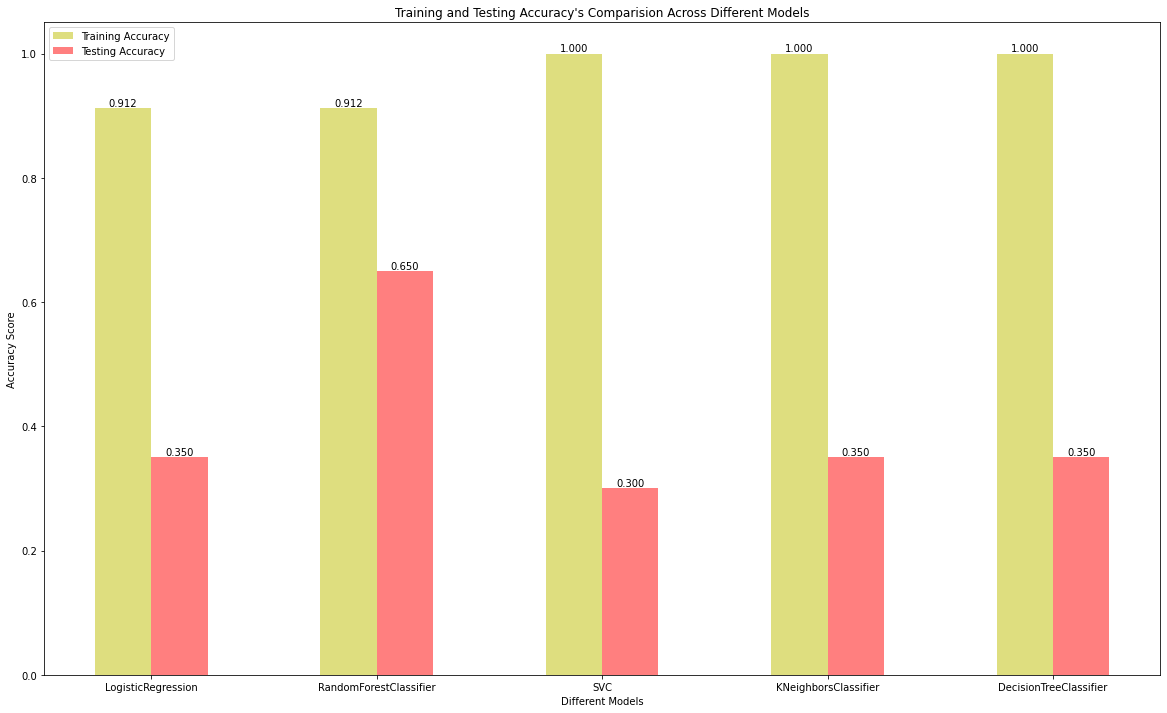

In [200]:
plt.figure(figsize=(20,12))
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,'%.3f' %float(round(height,3)),ha='center', va='bottom')
ind = np.arange(len(models))
trn_bar = plt.bar(ind, trn_accs, 0.25,alpha=0.5,color='y',label='Training Accuracy')
autolabel(trn_bar)
tst_bar = plt.bar(ind + 0.25, tst_accs, 0.25,alpha=0.5,color='r',label='Testing Accuracy')
autolabel(tst_bar)
plt.xlabel('Different Models')
plt.ylabel('Accuracy Score')
plt.title("Training and Testing Accuracy's Comparision Across Different Models")
plt.xticks(ind + 0.125, set(models))
plt.legend()
plt.show()